<a href="https://colab.research.google.com/github/Jayk957/MNIST/blob/main/MNIST_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification
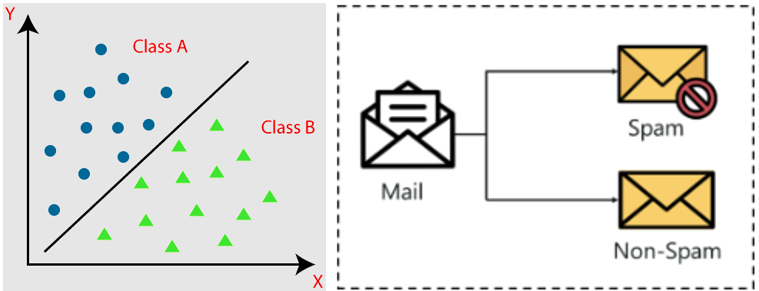

Classification is a predictive modelling problem in Machine Learning where a class Label is predicted for a given example of input data. In easier terms, it is basically classifying a given data or input set into a particular group, by using Statistical Principles. The spam detection algorithm of emails is a prime example of Classification.

In [ ]:
# Import necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## MNIST
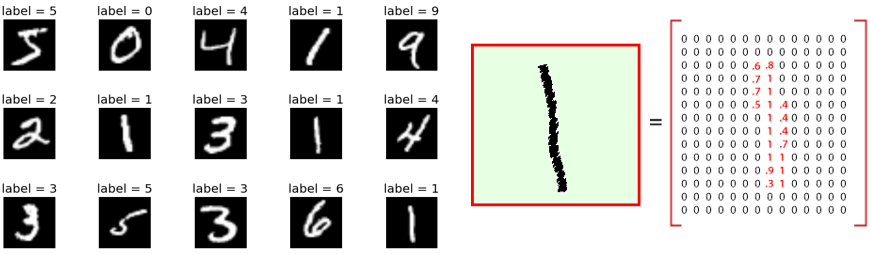

* MNIST is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau.
* Each image is labeled with the digit it represents. This set has been studied so much that it is often called the “Hello World” of Machine Learning

### Loading the data
* Scikit-Learn provides many helper functions to download popular datasets. MNIST isone of them.
* The following code fetches the MNIST dataset:
> fetch_openml("mnist_784", version=1)

In [ ]:
from sklearn.datasets import fetch_openml
df = fetch_openml("mnist_784", version=1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Datasets loaded by Scikit-Learn generally have a similar dictionary structure including:
* A DESCR key describing the dataset
* A data key containing an array with one row per instance and one column per
feature
* A target key containing an array with the labels

In [ ]:
df.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [ ]:
df.DESCR # give info about dataset

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [ ]:
#There are 70,000 images, and each image has 784 features. This is because each image is 28×28 pixels,
#and each feature simply represents one pixel’s intensity, from 0 (white) to 255 (black).
df.data.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Target tells us the actual number to which each handwriting image in df.data represting
df.target

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [ ]:
# Let's assign the df.data and df.target to varialbels X, Y for our convenience
X = df.data.values
Y = df.target
print(X.shape)
print(Y.shape)

(70000, 784)
(70000,)


In [ ]:
# the target Y is by default a string. We prefer numbers, so let’s cast y to integers:
Y = Y.astype("int8")

### Viewing an Image
* Since the image is currently one-dimension, we load it into a numpy array and reshape it so that it is two-dimensional (28x28 pixels)
* Then, we plot the image and label with matplotlib
* **You can change the value of variable idx to check out other images and labels**

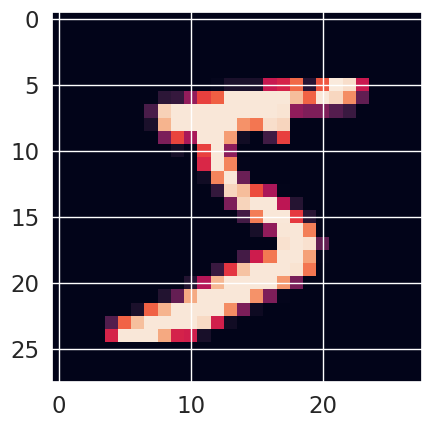

Target Value: 5


In [ ]:
idx = 0
plt.imshow(X[idx].reshape(28,28))
plt.show()
print("Target Value:", Y[idx])

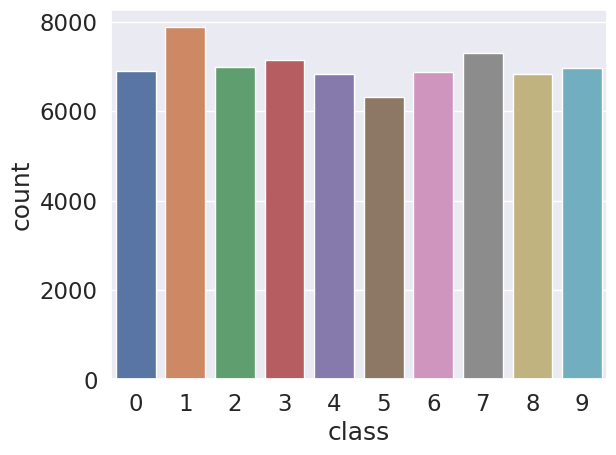

In [ ]:
# Let's Count the how many times each number present in dataset
sns.countplot(x=Y)
plt.show()

* You should always create a test set and set it aside before inspecting the data
closely.
* The MNIST dataset is actually already split into a training set (the first 60,000 images) and a test set (the last 10,000 images)

In [ ]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]

# Training a Binary Classifier
* Let’s simplify the problem for now and only try to identify one digit—for example, the number 5.
* This “5-detector” will be an example of a binary classifier, capable of distinguishing between just two classes, 5 and not-5.

In [ ]:
# Let’s create the target vectors for this classification task
y_train_5 = (y_train == 5) # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

* Okay, now let’s pick a classifier and train it.
* A good place to start is with a Stochastic Gradient Descent (SGD) classifier, using Scikit-Learn’s SGDClassifier class.
* This classifier has the advantage of being capable of handling very large datasets efficiently.

In [ ]:
# Create an SGDClassifier and train it on the whole training set
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

**NOTE** : The SGDClassifier relies on randomness during training (hence the name “stochastic”). If you want reproducible results, you should set the random_state parameter.

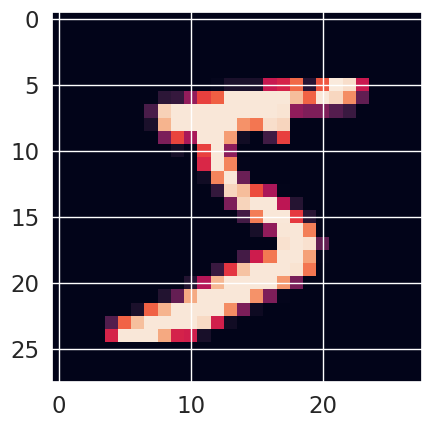

Target Value: 5


In [ ]:
img = X[0]
plt.imshow(img.reshape(28,28))
plt.show()
print("Target Value:", Y[0])

In [ ]:
sgd_clf.predict([img])

array([ True])

* The classifier guesses that this image represents a 5 (True). Looks like it guessed right in this particular case!
* Now, let’s evaluate this model’s performance.

## Performance Measures

### **1. Measuring Accuracy**
* Accuracy is the number of correctly predicted data points out of all the data points.
> Accuracy = **Number of correct predictions** / **Total number of predictions**

In [ ]:
y_pred = sgd_clf.predict(X_test) # predict for all image in x_test

In [ ]:
score = y_pred == y_test               # correct prediction = True, incorrect prediction = False
accuracy = score.sum() / y_pred.size    # score.sum() = count the total num of True (correct prediction)
print(accuracy)

0.0919


In [ ]:
# We can also use sklearn to calculate accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.0919

* It has over 90% accuracy! This is simply because only about 10% of the images are 5s, so if you always guess that an image is not a 5, you will be right about 90% of the time.
* This demonstrates why accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets (i.e., when some classes are much more frequent than others).

### **2. Confusion Matrix**
* A much better way to evaluate the performance of a classifier is to look at the confusion matrix.
* The general idea is to count the number of times instances of class A are classified as class B.
* For example, to know the number of times the classifier confused
images of 5s with 3s, you would look in the 5th row and 3rd column of the confusion matrix.

> `confusion_matrix()` takes two arguments target classes` `(`y_train_5`) and the predicted classes (`y_pred`)


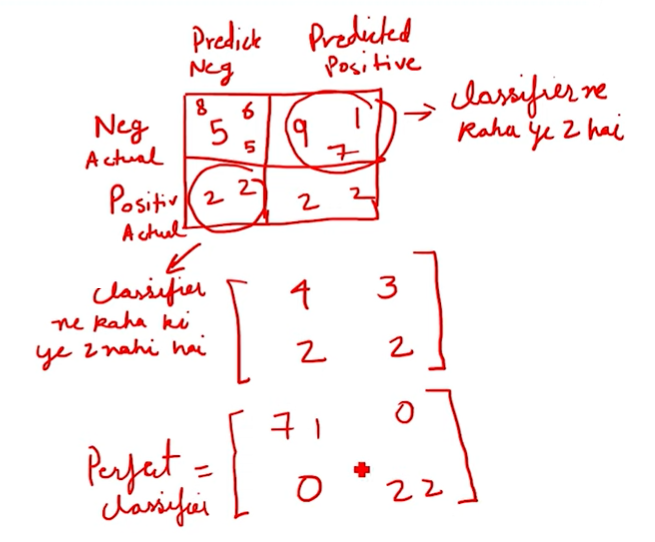

In [ ]:
from sklearn import metrics

conf_mat = metrics.confusion_matrix(y_test_5, y_pred)
conf_mat

array([[8707,  401],
       [ 107,  785]])

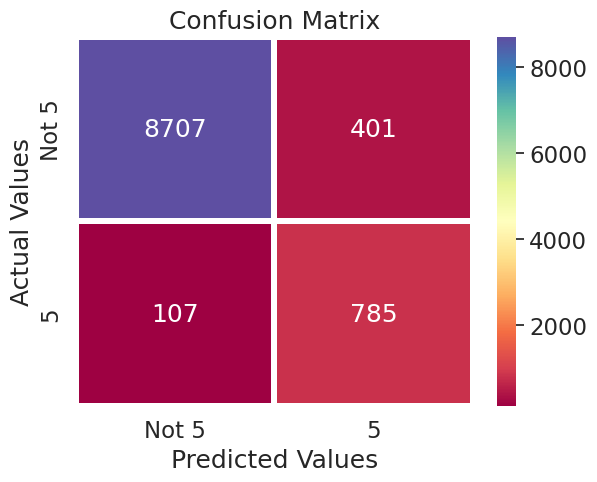

In [ ]:
# Plot the confusion Matrix Result
ax = plt.axes()             # matplotlib axis obj
sns.set(font_scale=1.5)     # Increase Font size

sns.heatmap(conf_mat, annot = True, fmt="d",
            xticklabels=["Not 5", "5"],
            yticklabels=["Not 5", "5"],
            ax = ax, linewidths = 3, cmap="Spectral")

ax.set_xlabel("Predicted Values")
ax.set_ylabel("Actual Values")
ax.set_title("Confusion Matrix")
plt.show()

* Each row in a confusion matrix represents an actual class, while each column represents a predicted class.

* The first row of this matrix considers non-5 images (the negative
class): 8707 of them were correctly classified as non-5s (they are called **true negatives**), while the remaining 401 were wrongly classified as 5s (**false positives**).

* The second row considers the images of 5s (the positive class): 107 were wrongly classified as non-5s (**false negatives**), while the remaining 785 were correctly classified
as 5s (**true positives**).

* A perfect classifier would have only true positives and true
negatives, so its confusion matrix would have nonzero values only on its main diagonal (top left to bottom right)

In [ ]:
y_prefect_prediction = y_train_5
metrics.confusion_matrix(y_train_5, y_prefect_prediction)

array([[54579,     0],
       [    0,  5421]])

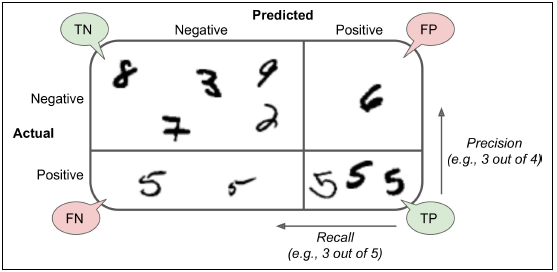

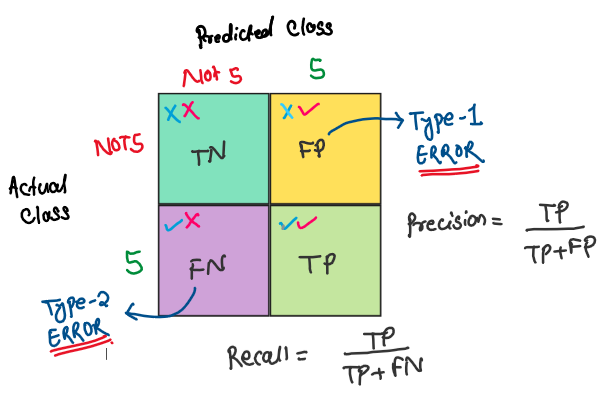

### **3. Precision**
Precision is also knoe as the accuracy of the positive predictions.
* Precision is one indicator of a machine learning model's performance – the quality of a positive prediction made by the model

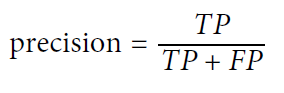

* **TP** is the number of true positives, and **FP** is the number of false positives.
* A trivial way to have perfect precision is to make one single positive prediction and ensure it is correct (precision = 1/1 = 100%).
* This would not be very useful since the classifier would ignore all but one positive instance.
* So precision is typically used along with another metric named recall, also called sensitivity or true positive rate

In [ ]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test_5, y_pred)

0.6618887015177066

### **4. Recall**
* Recall literally is how many of the true positives were recalled (found), i.e. how many of the correct hits were also found.
* Also known as **TPR(True Positive Rate)**: this is the ratio of positive instances that are correctly detected by the classifier

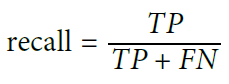

In [ ]:
recall_score(y_test_5, y_pred)

0.8800448430493274

* Now our 5-detector does not look as shiny as it did when you looked at its accuracy.
*When it claims an image represents a 5, it is correct only 66% of the time. Moreover, it only detects 88% of the 5s.

### **F1 - Score**
* It is often convenient to combine precision and recall into a single metric called the F1 score, in particular if you need a simple way to compare two classifiers.
* The F1 score is the harmonic mean of precision and recall

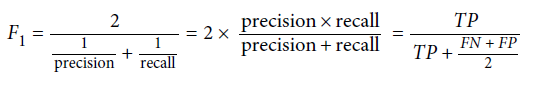

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test_5, y_pred)

0.75553416746872

## Precision/Recall Tradeoff

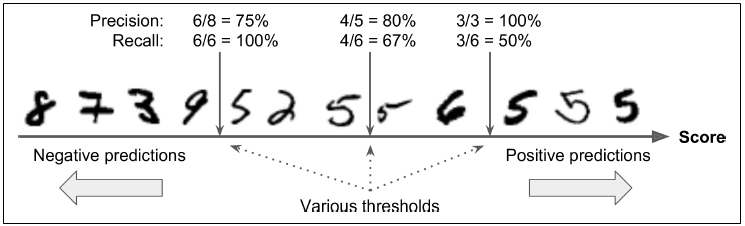

* For each instance, SGDClassifier computes a score based on a decision function, and if that score is greater than a threshold, it assigns the instance to the positive class, or else it assigns it to the negative class.

* Scikit-Learn does not let you set the threshold directly, but it does give you access to the decision scores that it uses to make predictions.
* Instead of calling the classifier’s predict() method, you can call its decision_function() method, which returns a score for each instance, and then make predictions based on those scores using any threshold you want

In [ ]:
y_scores = sgd_clf.decision_function([img])
y_scores

array([2164.22030239])

In [ ]:
threshold = 0
img_pred = (y_scores > threshold)
img_pred

array([ True])

In [ ]:
threshold = 8000
img_pred = (y_scores > threshold)
img_pred

array([False])

This confirms that raising the threshold decreases recall. The image actually represents
a 5, and the classifier detects it when the threshold is 0, but it misses it when the
threshold is increased to 8,000.

In [ ]:
# get all the score of x_train
y_score = sgd_clf.decision_function(X_test)
y_score

array([-8542.1753957 , -4410.49112461, -3416.59592944, ...,
       -3439.45626156,  9066.27363912, -6958.33943002])

In [ ]:
y_score.min(), y_score.max()

(-65824.20435336386, 18647.192653198654)

Now with these scores we can compute precision and recall for all possible thresholds using the precision_recall_curve() function

In [ ]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_test_5, y_score)

In [ ]:
precisions.shape, recalls.shape, thresholds.shape

((10001,), (10001,), (10000,))

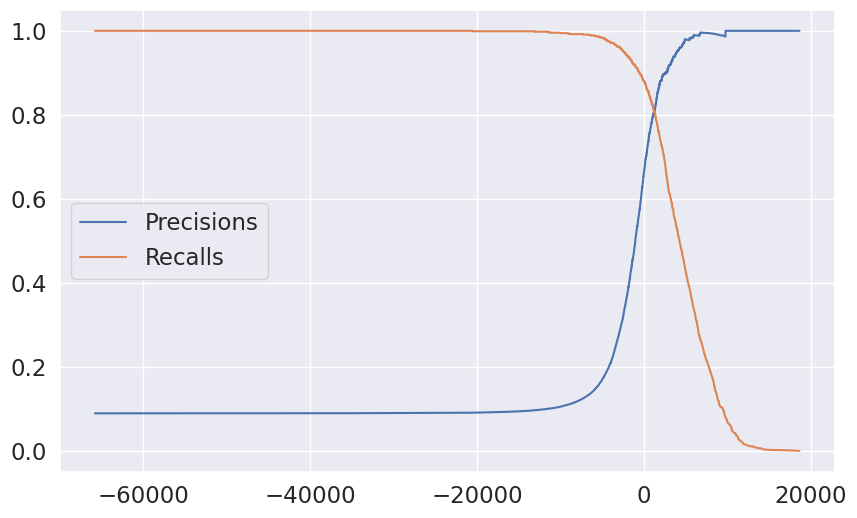

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[1:], label = 'Precisions')
plt.plot(thresholds, recalls[1:], label = 'Recalls')

plt.legend()
plt.show()

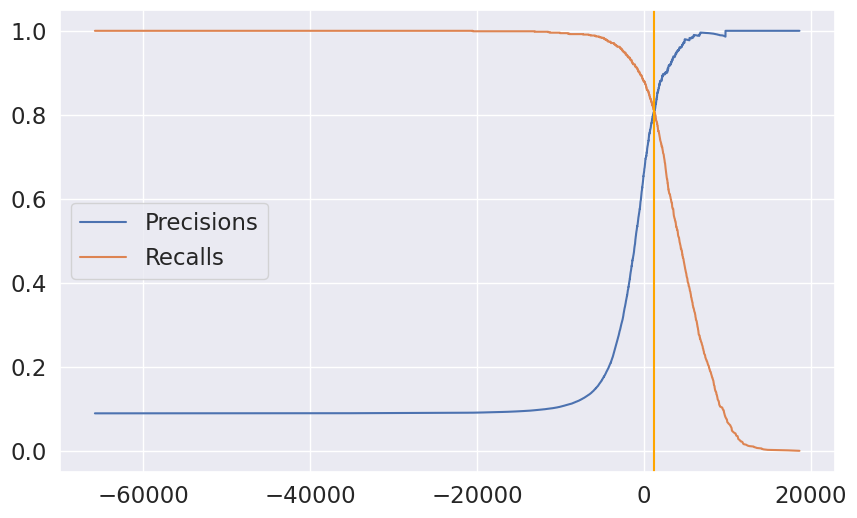

In [ ]:
# If you want to find where the precision and recall are same
same = precisions == recalls
idx = np.argmax(same)
threshold_of_same_point_ = thresholds[idx]

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[1:], label = 'Precisions')
plt.plot(thresholds, recalls[1:], label = 'Recalls')
plt.axvline(x=threshold_of_same_point_, color = "orange")
plt.legend()
plt.show()

Another way to select a good precision/recall tradeoff is to plot precision directly
against recall

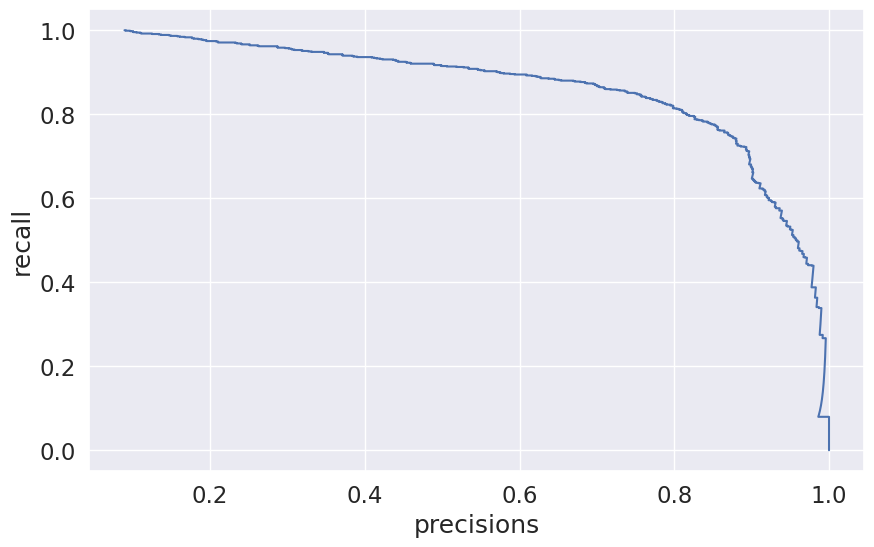

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(precisions, recalls, label = 'recalls')

plt.xlabel('precisions')
plt.ylabel('recall')
plt.show()

So let’s suppose you decide to aim for 90% precision. You look up the first plot and
find that you need to use a threshold of about 8,000. To be more precise you can
search for the lowest threshold that gives you at least 90% precision (np.argmax()
will give us the first index of the maximum value, which in this case means the first
True value):

In [ ]:
idx = np.argmax(precisions >= 0.90)
threshold_90_precision = thresholds[idx]
threshold_90_precision

2582.0796160995733

In [ ]:
y_test_pred_90 = (y_score >= threshold_90_precision)

In [ ]:
precision_score(y_test_5, y_test_pred_90)

0.9

In [ ]:
recall_score(y_test_5, y_test_pred_90)

0.6760089686098655

we have a 90% precision classifier ! As you can see, it is fairly easy to create a
classifier with virtually any precision you want: just set a high enough threshold, and
you’re done.

## The ROC Curve

* The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers.
* It is very similar to the precision/recall curve, but instead of plotting
precision versus recall, the ROC curve plots the **true positive rate**(another name for **recall**) against the **false positive rate.**

* The **FPR is the ratio of negative instances that are incorrectly classified as positive**.
* It is equal to one minus the true negative rate, which is the ratio of negative instances that are correctly classified as negative.
* The TNR is also called **specificity**.
* Hence the ROC curve plots **sensitivity** (recall) versus **1 – specificity**.

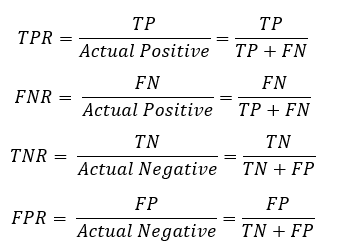

In [ ]:
fpr, tpr, threshold = metrics.roc_curve(y_test_5, y_score)

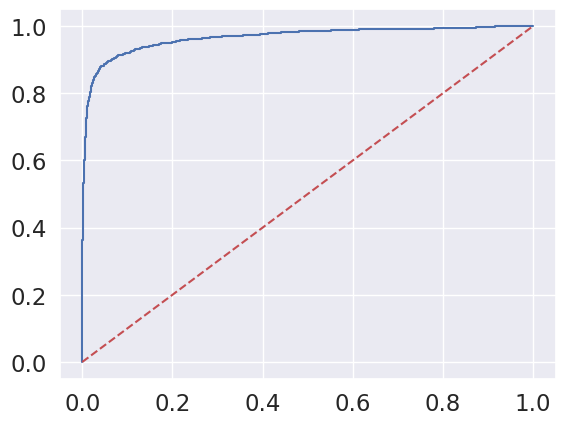

In [ ]:
plt.plot(fpr, tpr, label = 'auc')
plt.plot([0, 1], [0, 1], '--r')

* The higher the recall (TPR), the more false positives (FPR) the classifier produces.
* The dotted line represents the ROC curve of a purely random classifier;

* A good classifier stays as far away from that line as possible (toward
the top-left corner).

# AUC - Area Under the Curve
* One way to compare classifiers is to measure the area under the curve (AUC).
* A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.
* Scikit-Learn provides a function to compute the ROC AUC

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test_5, y_score)

0.9666231184923914

# RandomForestClassifier

Let's try the RandomForestClassifier for this same problem

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

In [ ]:
forest.fit(X_train, y_train_5)

RandomForestClassifier()

In [ ]:
y_score_forest = forest.predict_proba(X_test)

In [ ]:
y_score_forest

array([[0.99, 0.01],
       [0.98, 0.02],
       [1.  , 0.  ],
       ...,
       [0.99, 0.01],
       [0.06, 0.94],
       [0.96, 0.04]])

In [ ]:
y_score_forest = y_score_forest[:, 1]
y_score_forest

array([0.01, 0.02, 0.  , ..., 0.01, 0.94, 0.04])

In [ ]:
fpr_f, tpr_f, threshold_f = metrics.roc_curve(y_test_5, y_score_forest)

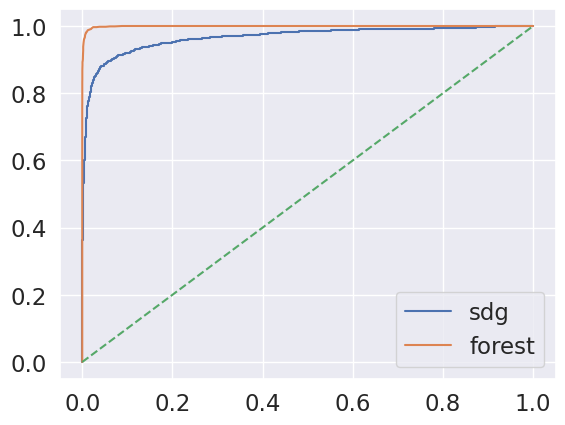

In [ ]:
plt.plot(fpr, tpr, label = 'sdg')
plt.plot(fpr_f, tpr_f, label = 'forest')
plt.plot([0, 1], [0, 1], '--')
plt.legend()

In [ ]:
roc_auc_score(y_test_5, y_score_forest)

0.999264493738319

# Multiclass Classification
* Whereas binary classifiers distinguish between two classes, multiclass classifiers (also called multinomial classifiers) can distinguish between more than two classes.
* Some algorithms (such as Random Forest classifiers or naive Bayes classifiers) are capable of handling multiple classes directly.
* Others (such as Support Vector Machine classifiers or Linear classifiers) are strictly binary classifiers.

* For example, one way to create a system that can classify the digit images into 10 classes (from 0 to 9) is to train 10 binary classifiers, one for each digit (a 0-detector, a 1-detector, a 2-detector, and so on). Then when you want to classify an image, you get the decision score from each classifier for that image and you select the class whose classifier outputs the highest score. This is called the one-versus-all (OvA) strategy (also called one-versus-the-rest).

* Another strategy is to train a binary classifier for every pair of digits: one to distinguish 0s and 1s, another to distinguish 0s and 2s, another for 1s and 2s, and so on. This is called the one-versus-one (OvO) strategy. If there are N classes, you need to train N × (N – 1) / 2 classifiers.

Scikit-Learn detects when you try to use a binary classification algorithm for a multiclass classification task, and it automatically runs OvA (except for SVM classifiers for
which it uses OvO).

Let’s try this with the SGDClassifier:

In [ ]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [ ]:
sgd_clf.predict([img])

array([3], dtype=int8)

In [ ]:
img_score = sgd_clf.decision_function([img])
img_score

array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [ ]:
np.argmax(img_score)

3

In [ ]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

If you want to force ScikitLearn to use one-versus-one or one-versus-all, you can use
the OneVsOneClassifier or OneVsRestClassifier classes.

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([img])

array([5], dtype=int8)

In [ ]:
len(ovo_clf.estimators_)

45